In [1]:
!pip install prince

# Dimensionality Reduction: MCA & FAMD Assignment

In [2]:
import prince
from sklearn.decomposition import PCA

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Import the HR data set 

In [3]:
data_url = 'https://raw.githubusercontent.com/Thinkful-Ed/data-science-lectures/master/hr_dataset.csv'

data = pd.read_csv(data_url)

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                310 non-null    int64  
 1   Pay Rate           310 non-null    float64
 2   State              310 non-null    object 
 3   Zip                310 non-null    int64  
 4   Sex                310 non-null    object 
 5   MaritalDesc        310 non-null    object 
 6   CitizenDesc        310 non-null    object 
 7   Hispanic/Latino    310 non-null    object 
 8   RaceDesc           310 non-null    object 
 9   Days Employed      310 non-null    int64  
 10  Reason For Term    310 non-null    object 
 11  Employment Status  310 non-null    object 
 12  Department         310 non-null    object 
 13  Position           310 non-null    object 
 14  Manager Name       310 non-null    object 
 15  Employee Source    310 non-null    object 
 16  Performance Score  310 non

,Age,Pay Rate,State,Zip,Sex,MaritalDesc,CitizenDesc,Hispanic/Latino,RaceDesc,Days Employed,Reason For Term,Employment Status,Department,Position,Manager Name,Employee Source,Performance Score
0,30,28.50,MA,1450,Female,Married,US Citizen,No,Black or African American,3317,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
1,34,23.00,MA,1460,Male,Divorced,US Citizen,No,Black or African American,1420,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Website Banner Ads,Fully Meets
2,31,29.00,MA,2703,Male,Single,US Citizen,No,White,1154,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Internet Search,Fully Meets
3,32,21.50,MA,2170,Female,Married,US Citizen,No,White,58,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Pay Per Click - Google,N/A- too early to review
4,30,16.56,MA,2330,Female,Single,US Citizen,No,White,940,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Website Banner Ads,N/A- too early to review


In [4]:
data.isnull().sum()[lambda x: x>0]

Series([], dtype: int64)

### Identify which columns in the data are numeric and which are categorical.

Correct any columns that have been misassigned a numeric data type when they should be categorical.

In [5]:
numeric = data.select_dtypes(include='number')
numeric.head()

,Age,Pay Rate,Zip,Days Employed
0,30,28.50,1450,3317
1,34,23.00,1460,1420
2,31,29.00,2703,1154
3,32,21.50,2170,58
4,30,16.56,2330,940


In [6]:
data['Zip'] = data['Zip'].astype('str')

### Pull out the categorical variables and note the dimensions of the data set.

In [7]:
categorical = data.select_dtypes(exclude='number')
categorical.shape

(310, 14)

### Reduce these categorical features down to two dimensions using MCA.

In [8]:
mca = prince.MCA()
mca.fit(categorical)
coordinates = mca.transform(categorical)
coordinates

,0,1
0,0.083870,0.174664
1,0.310213,0.195149
2,0.129397,0.295033
3,0.035864,0.089618
4,0.271032,0.084402
...,...,...
305,-0.006510,1.944754
306,-0.038188,1.602499
307,-0.008829,1.539057
308,-0.030239,1.728273


### Plot the coordinates of each resulting dimension.

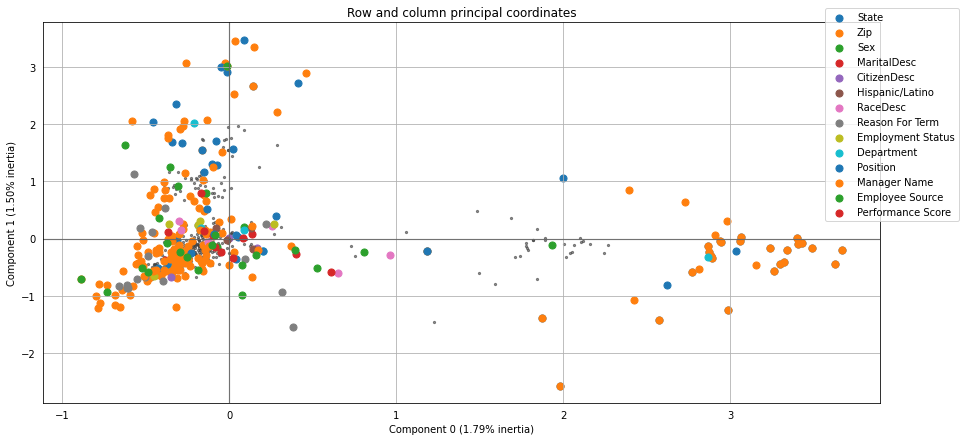

In [9]:
mca.plot_coordinates(
    X=categorical,
    ax=None,
    figsize=(15,7),
    show_row_points= True,
    row_points_size= 5,
    show_row_labels=False,
    show_column_points=True,
    column_points_size=50,
    show_column_labels=False
)
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

### One hot encode the categorical features and note the change in dimensions in the data set.

In [10]:
categorical_dummies = pd.get_dummies(categorical)
categorical_dummies.shape

(310, 313)

### Reduce the one hot encoded categorical features down to two dimensions using CA.

In [11]:
ca = prince.CA(n_components=2)
ca.fit(categorical_dummies)
coordinates_dummies = ca.transform(categorical_dummies)
coordinates_dummies

,0,1
0,0.078187,0.166553
1,0.305382,0.181111
2,0.122952,0.288864
3,0.031445,0.081374
4,0.265575,0.070959
...,...,...
305,-0.007274,1.941118
306,-0.038741,1.598287
307,-0.008775,1.531230
308,-0.029863,1.719669


### Plot the coordinates of each resulting dimension.

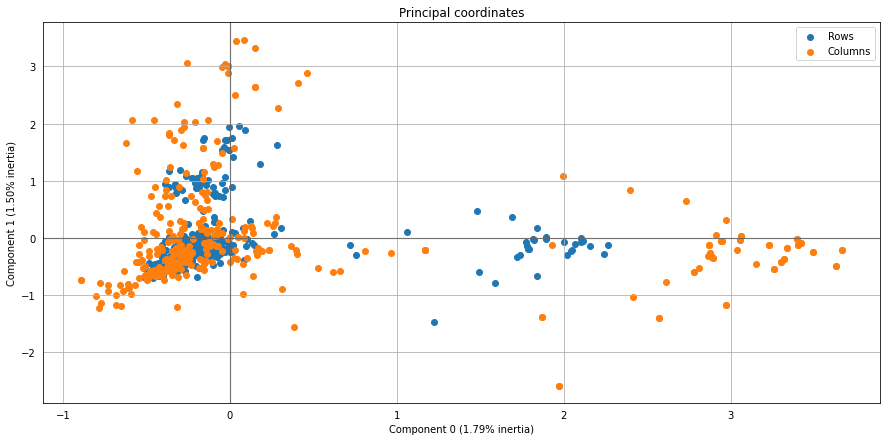

In [12]:
ca.plot_coordinates(
    X=categorical_dummies,
    ax=None,
    figsize=(15,7),
    show_row_labels=False,
    show_col_labels=False
)
plt.legend()
plt.show()

### Use FAMD to reduce the entire data set (both the categorical and numeric features) down to two dimensions.

In [13]:
famd = prince.FAMD()
famd.fit(data)
coordinates_famd = famd.transform(data)

### Plot the coordinates of each resulting dimension, color-coding the plot points according to Employment Status.

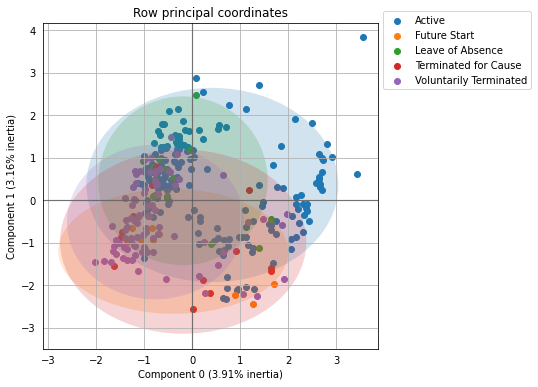

In [14]:
famd.plot_row_coordinates(data, color_labels=data['Employment Status'])
plt.legend(bbox_to_anchor=(1,1.05))
plt.show()